In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
#Cargar dataset
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding="utf-8")


#analisis de datos
df.info()

#df = df.drop('length', axis=1) 



df_isnull = df.isnull()
total_null_values = df_isnull.sum().sum()
print("num de nulos",total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
num de nulos 0


In [20]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)
#elimne nulos

Empty DataFrame
Columns: [Category, Resume]
Index: []


In [21]:
# Seleccionar la columna
columna = df["Resume"]

print(columna) 

# Contar valores únicos 
jobTitle_valores_unicos = columna.unique().shape[0]



# Imprimir el resultado 
print(f"Número de valores únicos en la columna 'Resume': {jobTitle_valores_unicos}")



0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object
Número de valores únicos en la columna 'Resume': 166


In [22]:
df['length Resume'] = df['Resume'].str.len()
df['length Resume'].describe()



count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: length Resume, dtype: float64

In [46]:
df['length Skills'] = df['Common Skills'].str.len()
df['length Skills'].describe()

count    4538.000000
mean      211.170560
std        34.069908
min       167.000000
25%       181.000000
50%       200.500000
75%       237.000000
max       286.000000
Name: length Skills, dtype: float64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_18272\3186742145.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length Resume']).set_title('cleaned_Resume length distribution')


Text(0.5, 1.0, 'cleaned_Resume length distribution')

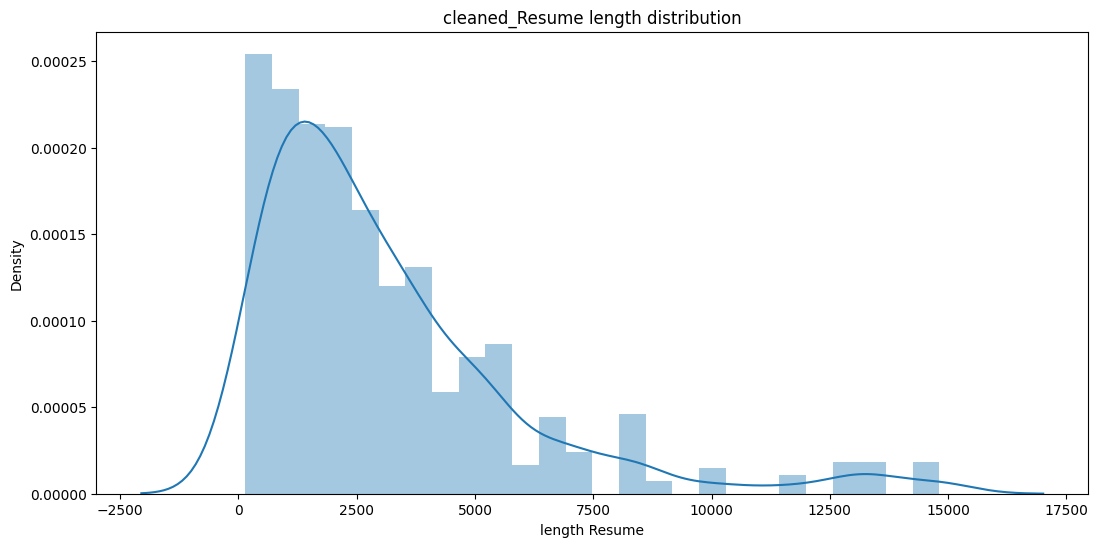

In [10]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length Resume']).set_title('cleaned_Resume length distribution')

In [48]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length Responsabilities']).set_title('Responsabilities length distribution')

KeyError: 'length Responsabilities'

<Figure size 1280x600 with 0 Axes>

C:\Users\pepeh\AppData\Local\Temp\ipykernel_26176\3200318755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length skills']).set_title('skills length distribution')


Text(0.5, 1.0, 'skills length distribution')

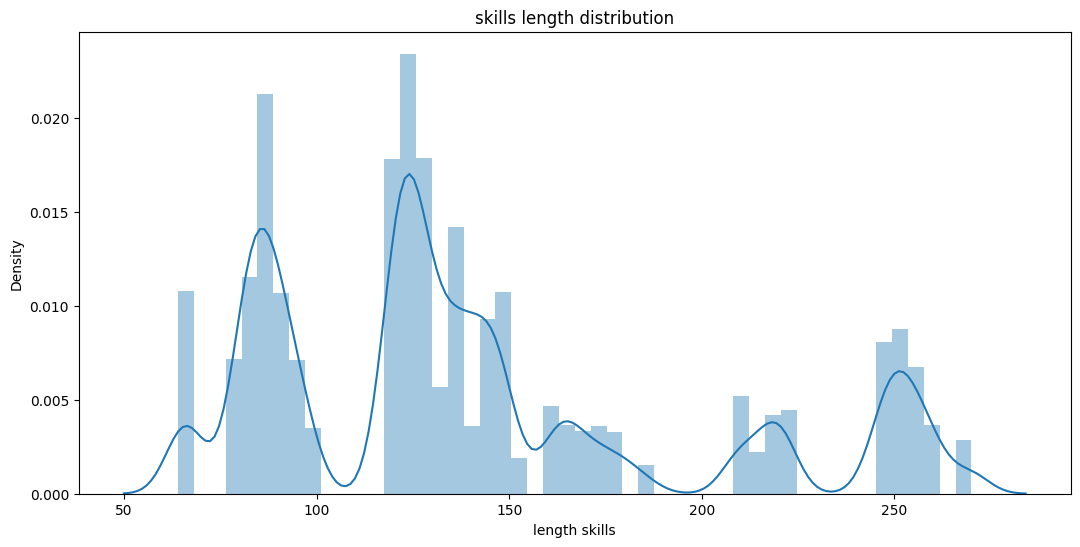

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length skills']).set_title('skills length distribution')

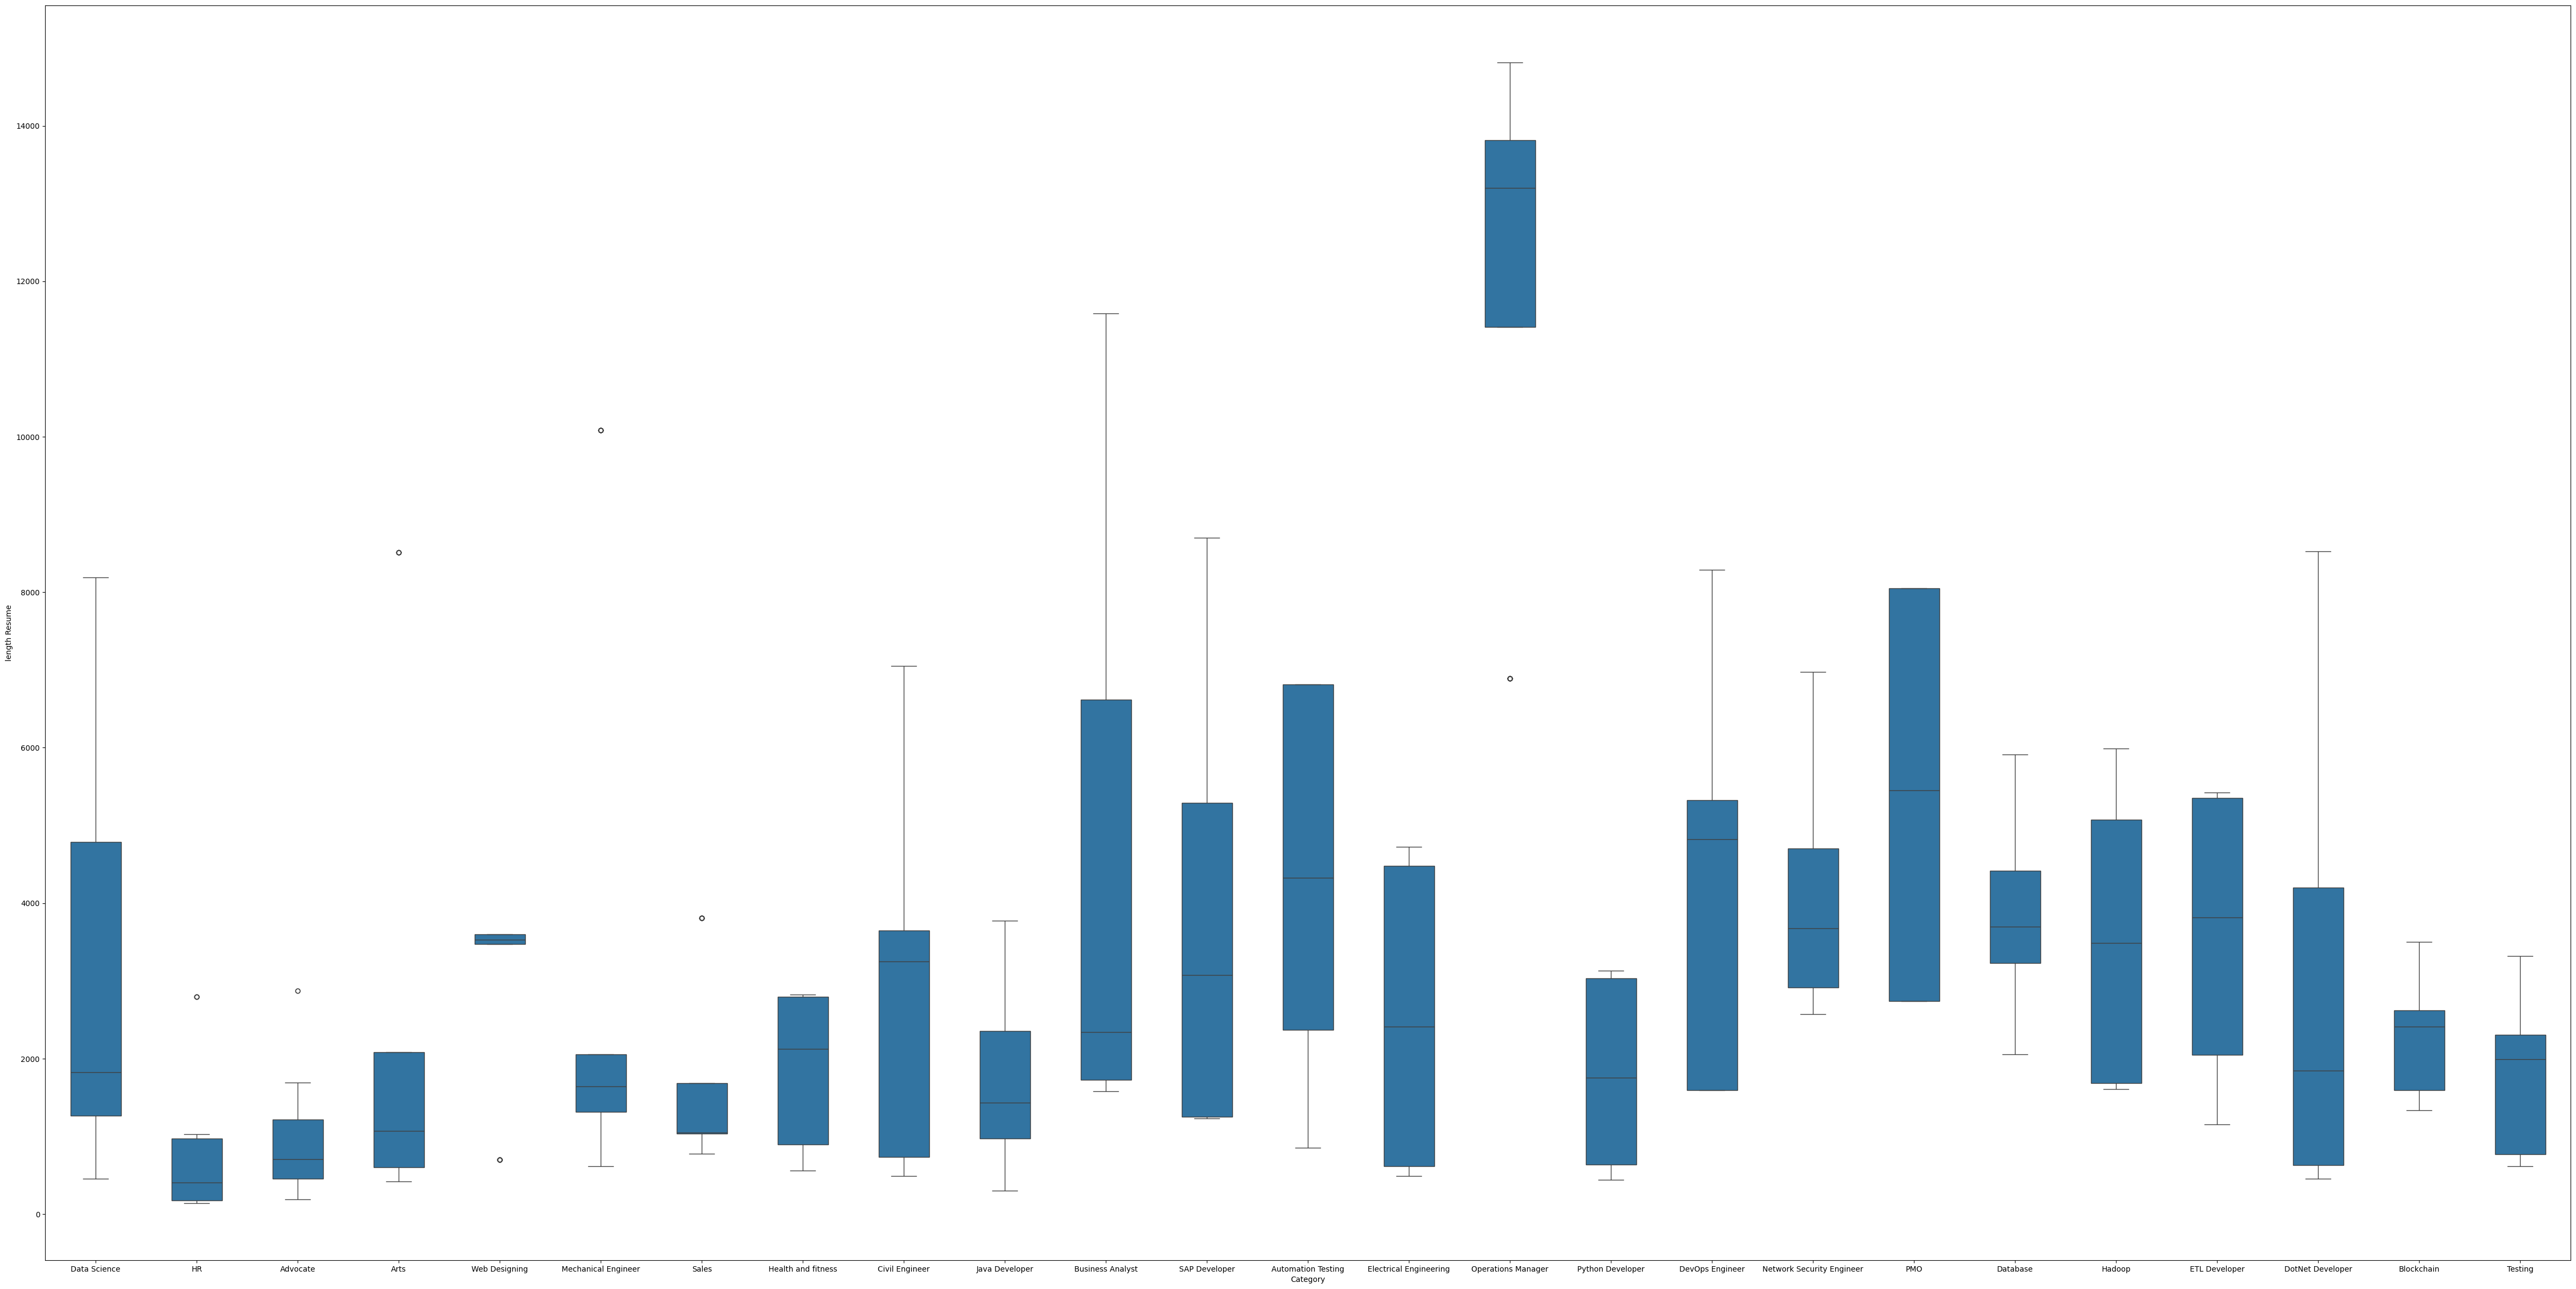

In [11]:
plt.figure(figsize=(60,30))
sns.boxplot(data=df, x='Category', y='length Resume', width=.5);

In [13]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_18272\2955146718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, palette='Reds')


<Axes: xlabel='count', ylabel='Category'>

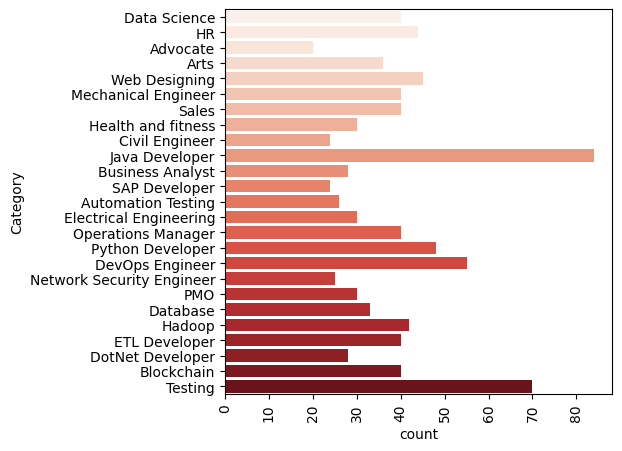

In [14]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [23]:

df['Category'].value_counts()[:3].index
# Contar los textos únicos en la columna "Texto"
numero_textos_unicos = df['Resume'].nunique()

# Imprimir el número de textos únicos
print(f"Número de textos únicos: {numero_textos_unicos}")

Número de textos únicos: 166


In [67]:
labels = [
    "Automation Testing",
    "Blockchain",
    "Data Science",
    "Database",
    "Designer",
    "DevOps Engineer",
    "DotNet Developer",
    "ETL Developer",
    "Information Technology",
    "Java Developer",
    "Network Security Engineer",
    "Project Manager",
    "Python Developer",
    "SAP Developer",
    "Security Analyst",
    "Testing",
    "Web Designing",
    "Web Developer"
]

In [68]:


a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["instruction"].isin(labels)]["Resume_test"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ ", size=20)
    plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 1000x600 with 0 Axes>

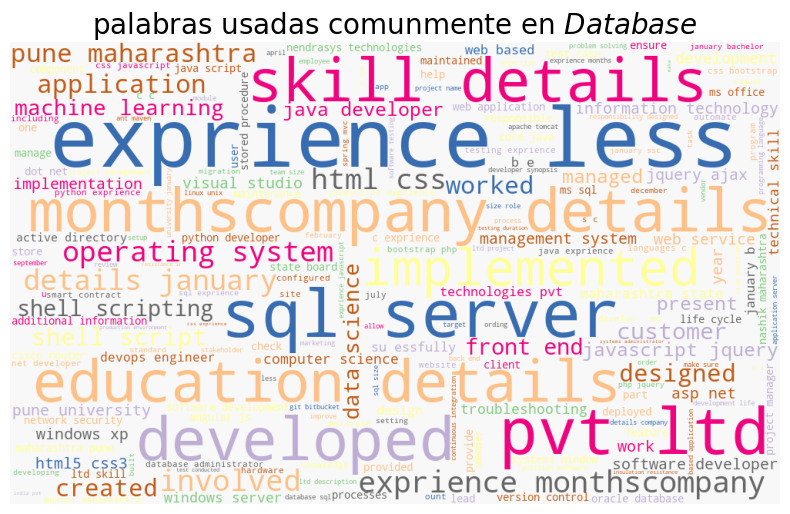

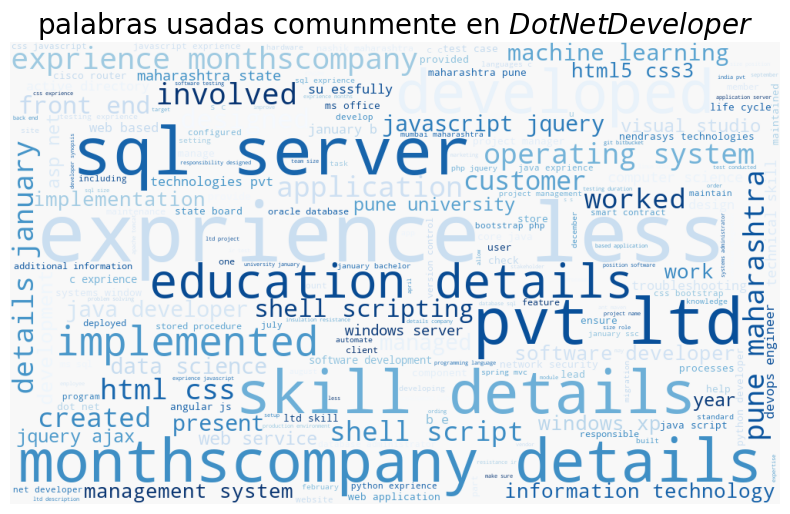

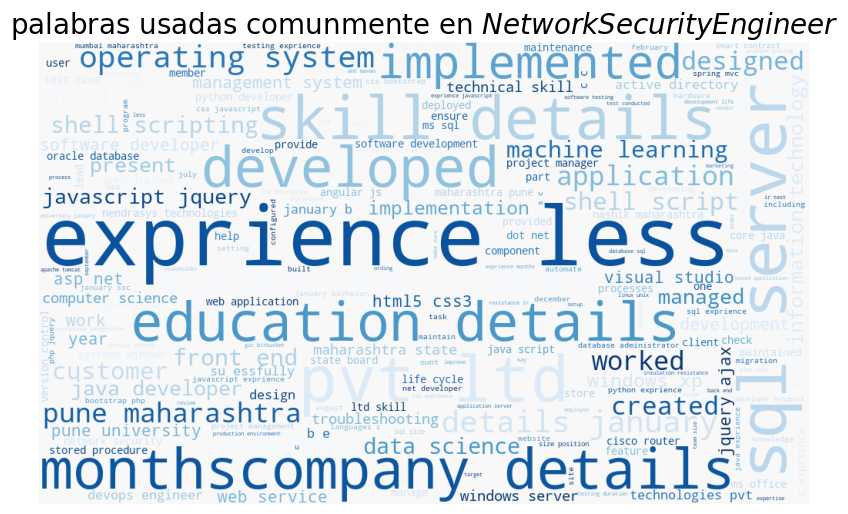

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$", size=20)
    plt.show()

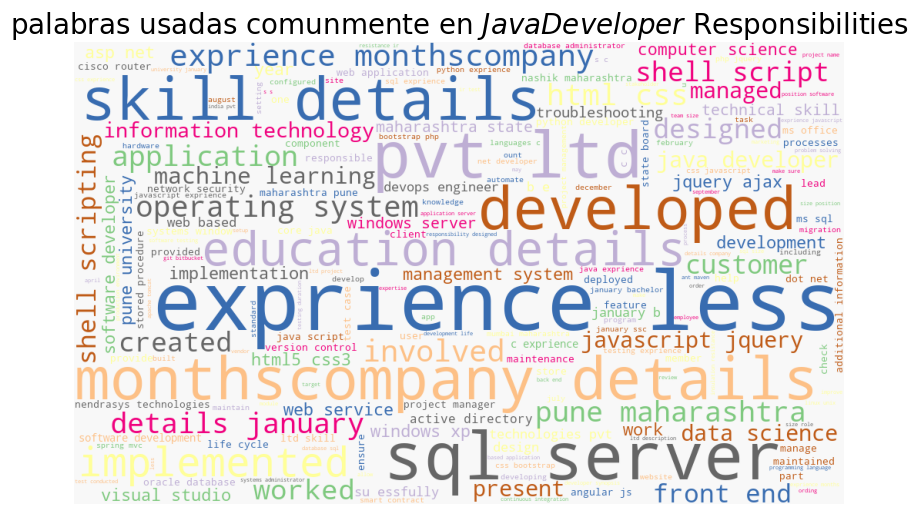

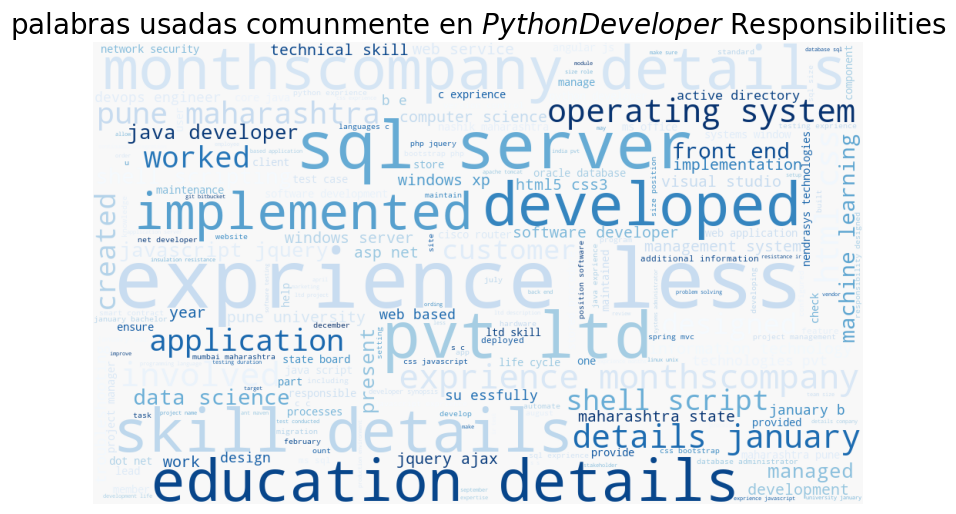

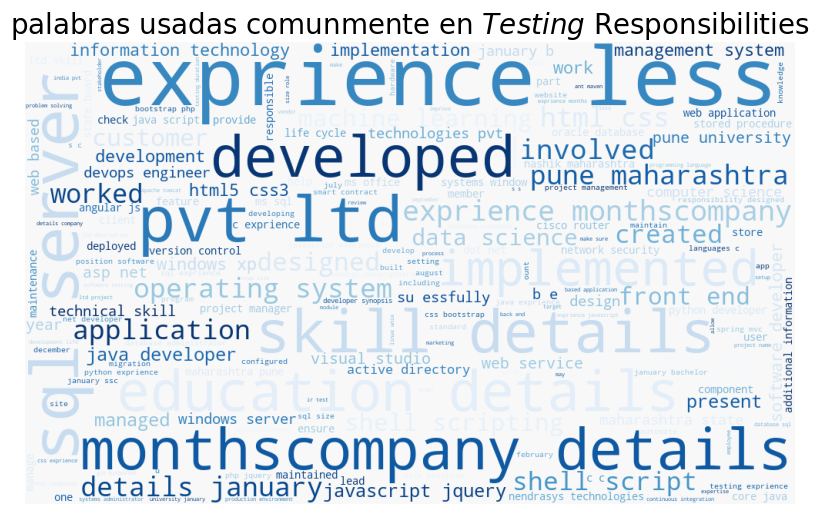

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$", size=20)
    plt.show()

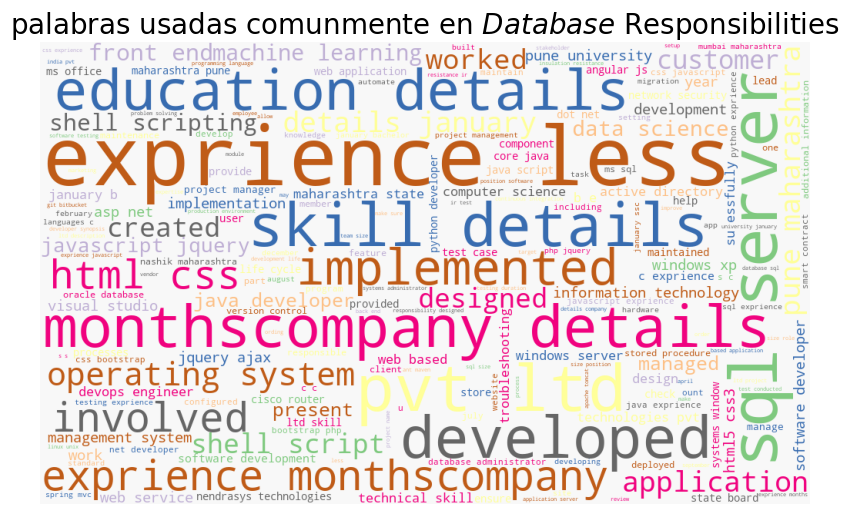

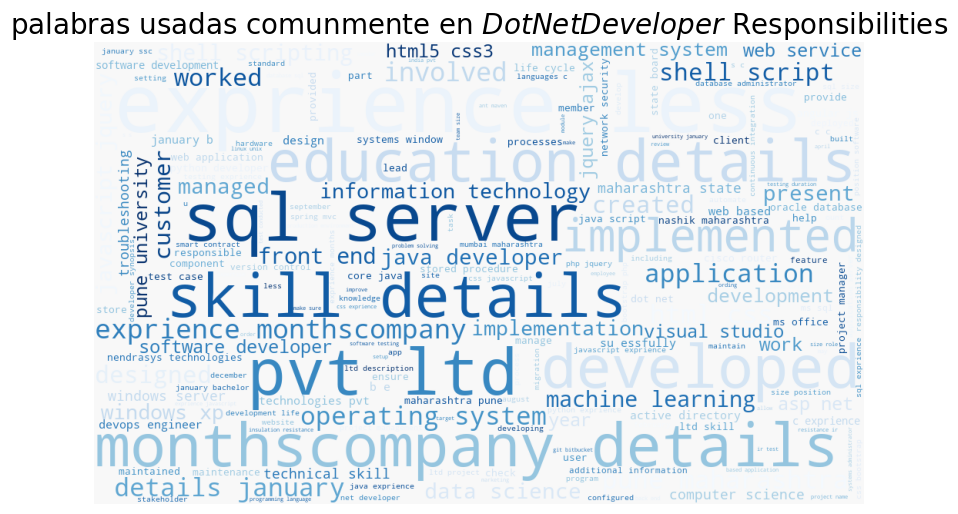

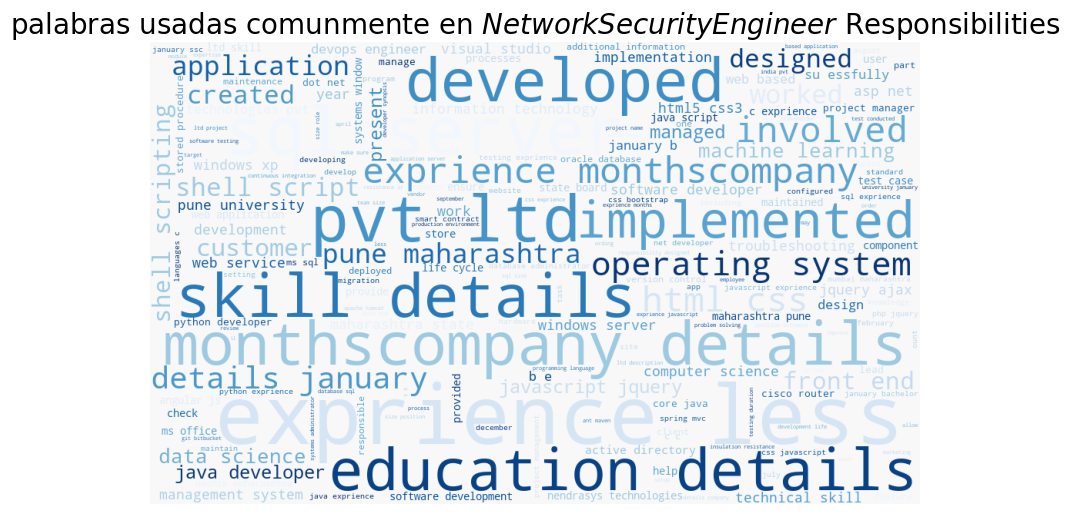

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()
    

In [ ]:
data.to_csv("archivo_filtrado.csv", index=False)


data

Qualifications           Job Title                    Role  \
0                 MBA  Back-End Developer           API Developer   
1                 MCA  Back-End Developer           API Developer   
2                  BA  Back-End Developer        Server Developer   
3              B.Tech  Back-End Developer        Server Developer   
4              B.Tech  Back-End Developer           API Developer   
...               ...                 ...                     ...   
237602         M.Tech       Web Developer    Full-Stack Developer   
237603         M.Tech       Web Developer    Full-Stack Developer   
237604            BCA       Web Developer   Backend Web Developer   
237605         B.Tech       Web Developer   Backend Web Developer   
237606            BCA       Web Developer  Frontend Web Developer   

                                          Job Description  \
0       An API Developer creates and maintains applica...   
1       An API Developer creates and maintains applica...   
2       A Server Developer specializes in developing a...   
3       A Server Developer specializes in developing a...   
4       An API Developer creates and maintains applica...   
...                                                   ...   
237602  Full-Stack Developers are skilled in both fron...   
237603  Full-Stack Developers are skilled in both fron...   
237604  Backend Web Developers build and maintain the ...   
237605  Backend Web Developers build and maintain the ...   
237606  Frontend Web Developers design and implement u...   

                                                   skills  \
0       API design and development RESTful API knowled...   
1       API design and development RESTful API knowled...   
2       Server-side programming languages (e.g., Java,...   
3       Server-side programming languages (e.g., Java,...   
4       API design and development RESTful API knowled...   
...                                                   ...   
237602  Frontend and backend development Database inte...   
237603  Frontend and backend development Database inte...   
237604  Server-side programming (e.g., Node.js, Python...   
237605  Server-side programming (e.g., Node.js, Python...   
237606  HTML, CSS, JavaScript Frontend frameworks (e.g...   

                                         Responsibilities  \
0       Design and implement APIs (Application Program...   
1       Design and implement APIs (Application Program...   
2       Develop and maintain server-side logic and dat...   
3       Develop and maintain server-side logic and dat...   
4       Design and implement APIs (Application Program...   
...                                                   ...   
237602  Work on both frontend and backend aspects, cre...   
237603  Work on both frontend and backend aspects, cre...   
237604  Develop server-side logic and databases to sup...   
237605  Develop server-side logic and databases to sup...   
237606  Design and code user interfaces for websites, ...   

        length Job Description  length Responsabilities  length skills  
0                          158                      199             80  
1                          158                      199             80  
2                          159                      187             90  
3                          159                      187             90  
4                          158                      199             80  
...                        ...                      ...            ...  
237602                     248                      175             83  
237603                     248                      175             83  
237604                     221                      175             88  
237605                     221                      175             88  
237606                     231                      220             85  

[237607 rows x 9 columns]